In [13]:
from linesUtils import *

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

SyntaxError: invalid syntax (1855277504.py, line 5)

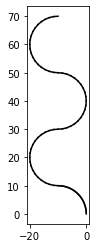

In [3]:
lines=make_curve(90, 10, start_point=[0,0],n_lines=30,left=True)
ax=plt.gca()
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,10],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,30],n_lines=20,left=True,start_degree=270)
for l in lines:
    l.draw(ax)
    
lines=make_curve(180, 10, start_point=[-10,50],n_lines=20,left=False,start_degree=90)
for l in lines:
    l.draw(ax)
    
ax.set_aspect('equal', adjustable='box')

In [5]:
lines[0].distance(1,1)

47.98589929991695

In [6]:
lines[0].length

1.5691819145568986

In [7]:
l=Line((0,1),(4,5))

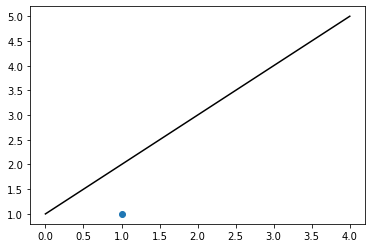

In [10]:
l.draw(plt.gca())
plt.plot(1,1,"o")

In [16]:
l.distance(np.array([1,2,2,2]),np.array([1,9,2,2]))

array([0.70710678, 4.24264069, 0.70710678, 0.70710678])

In [ ]:
intersects()

In [262]:
def intersects(s0,s1):
    dx0 = s0[1][0]-s0[0][0]
    dx1 = s1[1][0]-s1[0][0]
    dy0 = s0[1][1]-s0[0][1]
    dy1 = s1[1][1]-s1[0][1]
    p0 = dy1*(s1[1][0]-s0[0][0]) - dx1*(s1[1][1]-s0[0][1])
    p1 = dy1*(s1[1][0]-s0[1][0]) - dx1*(s1[1][1]-s0[1][1])
    p2 = dy0*(s0[1][0]-s1[0][0]) - dx0*(s0[1][1]-s1[0][1])
    p3 = dy0*(s0[1][0]-s1[1][0]) - dx0*(s0[1][1]-s1[1][1])
    return (p0*p1<=0) & (p2*p3<=0)
        


def randomPath():
    pathList = []
    StartCord = (0,0)
    startDir = 0
    ranStop = random.randint(0, 3)
    hasIntersect = False

    while ranStop > 2:
        ranLength = random.random() * 30 + 20
        newCord = (StartCord[0]+ranLength*(math.cos(math.radians(startDir))),StartCord[1]+ranLength*(math.sin(math.radians(startDir))))
        list2 = [StartCord,newCord]
  
        for i in range(len(pathList)):
            list1 = [(pathList[i].startX, pathList[i].startY), (pathList[i].endX, pathList[i].endY)]
            if intersects(list1,list2):
                hasIntersect = True
                break
        if hasIntersect:
            continue

        pathList.append(Line(StartCord,newCord))
        Dir = bool(random.getrandbits(1))

        newAngle = random.random()*135+45
        newcurve = make_curve(newAngle, 10, start_point=[newCord[0],newCord[1]],n_lines=20,left=Dir,start_degree=startDir-90)
        if Dir:
            startDir = 360 % (startDir+newAngle)
        else:
            startDir = 360 % (startDir-newAngle)
        for i in range(len(newcurve)):
          pathList.append(newcurve[i])
        StartCord = (newcurve[-1].endX,newcurve[-1].endY)
        ranStop = random.randint(0,6)
    return pathList

In [472]:
def ranPath():
    pathList = []
    StartCord = (0,0)
    startDir = 0
    ranStop = random.randint(0, 3)
    hasIntersect = False

    while ranStop > 2:
        ranLength = random.random() * 30 + 20
        newCord = (StartCord[0]+ranLength*(math.cos(math.radians(startDir))),StartCord[1]+ranLength*(math.sin(math.radians(startDir))))
        list2 = [StartCord,newCord]


        pathList.append(Line(StartCord,newCord))
        Dir = bool(random.getrandbits(1))
        
        
        newAngle = random.random()*135+45
        newcurve = make_curve(newAngle, 10, start_point=[newCord[0],newCord[1]],n_lines=20,left=Dir,start_degree=startDir-90)
        
        if Dir:
            startDir = startDir+newAngle
        else:
            startDir = startDir-newAngle
        for i in range(len(newcurve)):
          pathList.append(newcurve[i])
        StartCord = (newcurve[-1].endX,newcurve[-1].endY)
        ranStop = random.randint(0,6)

        for i in range(len(newcurve)):
          pathList.append(newcurve[i])
        StartCord = (newcurve[-1].endX,newcurve[-1].endY)
        ranStop = random.randint(0,6)
    return pathList

<function matplotlib.pyplot.show(close=None, block=None)>

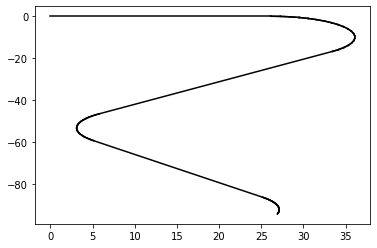

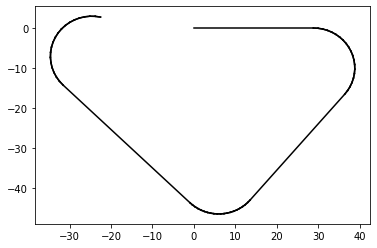

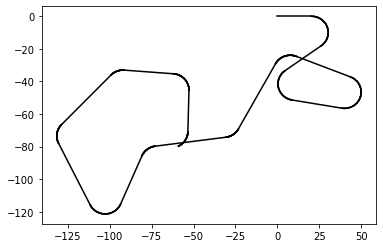

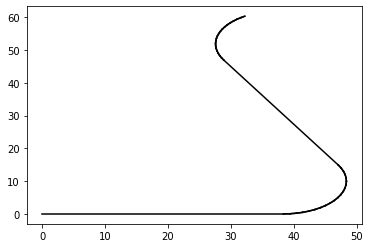

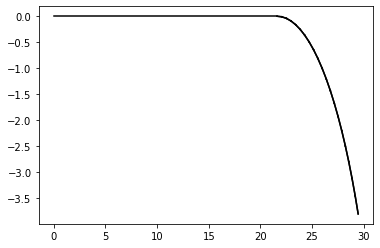

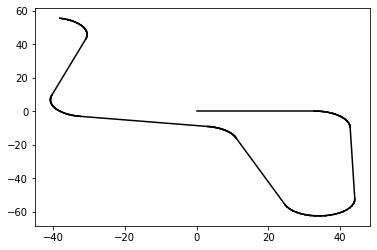

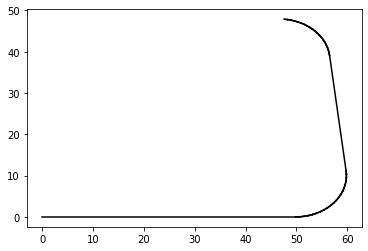

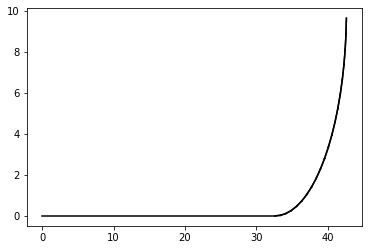

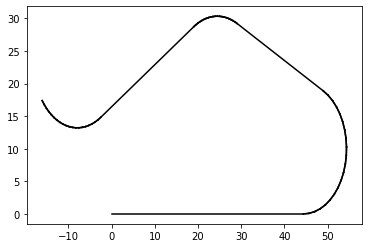

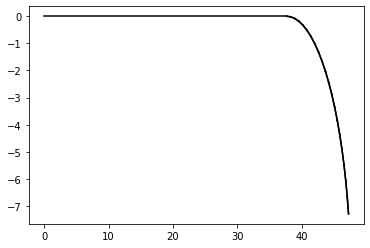

In [475]:
for i in range(10):
    ax=plt.subplots()
    lines = ranPath()
    while len(lines) == 0:
        lines = ranPath()
    for l in lines:
        l.draw(ax)
plt.show